In [1]:
import numpy as np
import gurobipy as gp
import matplotlib.pyplot as plt
from gurobipy import GRB
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
from utils import *

## Master problem correctness

In [3]:
file_name = "test7_slack12"
n = 200
K = 5
seed = 5
l = 3
alpha = 1/2
beta = [1, 1, 1]
lower = 2
upper = n
M = 1e3
np.random.seed(seed)
labels = np.random.choice([0, 1, 2], p=[0.1, 0.2, 0.7], size=n)

X, Y, archetype = synthetic_data(n, K, seed)
centers, dist, q, clusters, clusters_assign, t = initialize_clusters(X,K,l,alpha,beta,n,labels,M,lower,upper)

Optimizing Cluster Centers:   0%|          | 0/300 [00:00<?, ?it/s]

Optimizing Cluster Centers: 100%|██████████| 300/300 [00:00<00:00, 3716.49it/s, Status=SUCCESS]

Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-08


In [12]:
centers

[(-0.29253811672620883, 0.683657982368989),
 (1.0062366945086323, 1.5842762793482357),
 (-1.1225092831099028, -1.3425629882463122),
 (-0.2713429417627854, -2.6980812726388406),
 (-1.4048994740710539, -5.614513663061244)]

In [2]:
file_name = "test9_slack11"
n = 200
K = 5
seed = 5
l = 4
alpha = 0.51
beta = [1, 1, 1, 1]
lower = 5
upper = n
M = 1e3
np.random.seed(seed)
labels = np.random.choice([0, 1, 2, 3], p=[0.2, 0.2, 0.2, 0.4], size=n)

X, Y, archetype = synthetic_data(n, K, seed)
centers, dist, q, clusters, clusters_assign, t = initialize_clusters(X,K,l,alpha,beta,n,labels,M,lower,upper)

Optimizing Cluster Centers: 100%|██████████| 300/300 [00:00<00:00, 6572.70it/s, Status=SUCCESS]

Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-08


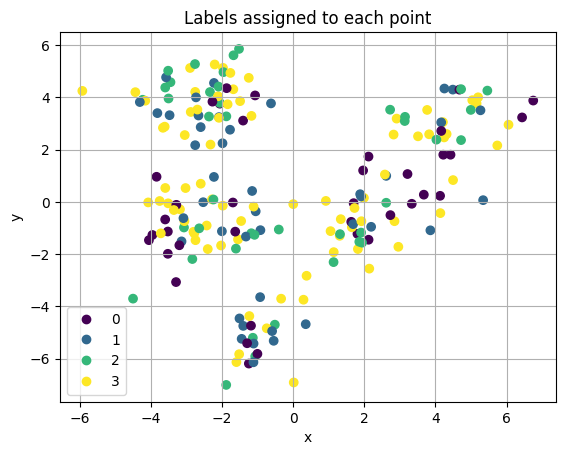

In [7]:
scatter = plt.scatter(X[:,0],X[:,1],c=labels,label="Groups")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Labels assigned to each point')
plt.grid(True)
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1,2,3])
plt.show()

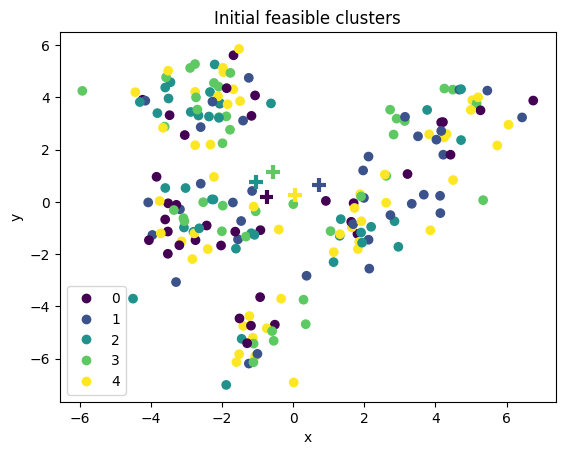

In [9]:
scatter = plt.scatter(X[:,0],X[:,1],c=clusters_assign,label="Groups")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Initial feasible clusters')
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1,2,3,4])
plt.scatter([x[0] for x in centers],[x[1] for x in centers], marker="+", c=[0,1,2,3,4], s=100, linewidth=3)
plt.show()

In [11]:
pt = 1
(xc,yc) = (-1.744270101129342, 1.1794268573010105)
print(((X[pt][0] - xc) ** 2 + (X[pt][1] - yc) ** 2) ** 0.5)

8.274196594151562


In [50]:
old_dist_1 = [0.0, 7.707825939892317, 5.493892999494312, 4.523587051693442, 5.5300275452361305, 4.547665587119241, 6.817068876820428, 6.120203013768313, 6.147022195051055, 7.110347346803836, 5.678738236876461, 5.33291262755057, 6.809000572513938, 6.702686682772461, 7.128994171415653, 5.485685677787011, 6.42420577892201, 7.038789677345225, 5.696183641054587, 8.045320620285912, 0.16325638587582536, 6.334531159553402, 4.557942119103139, 5.782560030748108, 6.230420896559995, 5.1330283692380005, 0.0, 0.16325638587582536, 3.934890794503483, 0.16325638587582536, 3.3667372015852766, 4.22091061973528, 0.16325638587582536, 0.0, 0.16325638587582536, 3.2787878002035447, 0.0, 0.16325638587582536, 0.16325638587582536, 4.237707841848454, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 4.087260783240241, 0.16325638587582536, 0.16325638587582536, 3.822188119766786, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 6.34633466087771, 4.701152787483532, 5.815586407683742, 4.576458125228537, 3.697417704140641, 4.2570271841767875, 5.4650231529565705, 0.16325638587582536, 3.7958621354450477, 5.836446904190667, 4.45506488430009, 7.340092619829911, 0.16325638587582536, 0.16325638587582536, 3.264713645258979, 5.308424626755676, 5.8748989904515, 3.8177402021703255, 3.922196883045498, 6.03395321389405, 4.595429906380295, 0.16325638587582536, 4.482078118495322, 5.844716909730312, 0.16325638587582536, 5.621939349721949, 4.892831189718284, 0.16325638587582536, 4.65270549143287, 5.767585255238856, 4.411988340941775, 6.800862349800263, 0.16325638587582536, 4.143706219161011, 4.248074813478417, 5.611710149196985, 3.8285039415337447, 4.50560694589121, 6.390193846643549, 5.8165272968166, 3.4397172714124404, 0.16325638587582536, 4.537747308474167, 0.0, 0.16325638587582536, 3.480179639918523, 0.16325638587582536, 0.16325638587582536, 3.6392093531745773, 0.16325638587582536, 4.174237019244349, 3.6968660010583014, 0.16325638587582536, 0.16325638587582536, 3.619657330836385, 3.9111137416059463, 3.495416066482991, 0.16325638587582536, 4.236870855199206, 3.6865617267848014, 3.6232341636505305, 0.16325638587582536, 0.16325638587582536, 3.4944891245299043, 0.16325638587582536, 3.487787952369162, 0.16325638587582536, 3.471141472611814, 0.16325638587582536, 0.16325638587582536, 0.16325638587582536, 3.2706354141181215, 0.16325638587582536, 0.16325638587582536, 3.9250562026955986, 3.9637498414976893, 3.9637843787448483, 3.61104164421374, 4.5561986877956535, 4.090802119733482, 4.298343121591031, 3.5988059052308405, 0.16325638587582536, 0.16325638587582536, 4.100890505432303, 3.2473282573522257, 0.16325638587582536, 3.380344693256891, 4.236820771784612, 3.965102161691444, 3.924645290516245, 3.467156239591479, 5.117876734258717, 0.16325638587582536, 6.925550887572527, 0.16325638587582536, 0.0, 3.6767165866296083, 3.2643224996985465, 5.008294061627813, 5.314243767271086, 4.173595406421376, 3.9123348611779245, 3.4729968533854003, 4.788173354121772, 5.24826332498338, 4.635264070201489, 4.400903584363258, 4.43200958053962, 5.232069279250577, 0.16325638587582536, 3.5078338993349107, 3.713291783994158, 4.214044578680281, 5.127719366653527, 5.32851799253387, 0.16325638587582536, 5.297913787275289, 5.169704259624934, 5.390622601555779, 4.050135439791695, 0.16325638587582536, 0.16325638587582536, 4.257786221643821, 4.258692922369958, 4.161002450762813, 3.891819498298042, 4.774869754164202, 5.296589097056413, 3.587795473443507, 4.5257424245169755, 3.434484583496101, 5.540743453074687, 5.651600198349177, 4.354556122728361, 3.244148552046023, 0.16325638587582536, 4.682972654948001, 0.16325638587582536, 3.836924792652387]
old_dist_2 = [0, 7.707825939890159, 5.493892999487558, 4.5235870516872705, 5.53002754524105, 4.547665587112176, 6.817068876819047, 6.120203013768749, 6.147022195047258, 7.110347346793775, 5.678738236871983, 5.3329126275462, 6.809000572507688, 6.702686682776699, 7.128994171410882, 5.485685677774476, 6.4242057789194655, 7.038789677339856, 5.696183641048594, 8.04532062028707, 1.920662624790803, 6.334531159551364, 4.557942119091128, 5.7825600307464065, 6.230420896556228, 5.133028369240734, 0, 1.9280672882954373, 3.934890794506782, 3.034191356351016, 3.366737201581955, 4.220910619737024, 3.130925906570547, 0, 2.6596045499120406, 3.278787800202242, 0, 2.690048168803443, 2.3645333820594754, 4.237707841837354, 1.8709265210485344, 1.1337287321522036, 2.0141469737769855, 2.15064434014506, 1.8271058225943533, 2.92793308425901, 2.9216487557708724, 2.7438478540260425, 2.43061502965234, 3.0032468162466355, 3.1658650021655594, 2.3630054386792425, 2.9559605510531526, 4.087260783234443, 2.201900886629706, 2.30275734083548, 3.822188119761303, 1.9412200175497512, 2.397219061954397, 2.666298406124079, 6.34633466088234, 4.701152787478519, 5.815586407682324, 4.576458125218463, 3.697417704141705, 4.257027184176806, 5.465023152951105, 1.9262319293342063, 3.7958621354446325, 5.83644690417967, 4.455064884289987, 7.340092619825788, 2.541120700607811, 1.9192625653336393, 3.2647136452471015, 5.30842462674623, 5.874898990440681, 3.817740202159932, 3.92219688303129, 6.033953213888267, 4.595429906373552, 3.1427458040568763, 4.482078118495782, 5.844716909726457, 2.2390276826578197, 5.621939349707758, 4.8928311897118295, 2.507751690053686, 4.6527054914237045, 5.767585255233068, 4.4119883409457605, 6.800862349805961, 2.379597994751982, 4.143706219126008, 4.24807481346277, 5.61171014919851, 3.828503941526025, 4.505606945877589, 6.390193846644768, 5.816527296819659, 3.4397172713989868, 2.767748556350492, 4.537747308459973, 0, 3.0924658008747, 3.4801796399399896, 1.6245157703822208, 2.7342341111471664, 3.639209353155226, 2.681850583326203, 4.174237019242908, 3.6968660010555774, 2.1331447291349446, 1.9583946025190553, 3.6196573308305093, 3.9111137416263215, 3.495416066466094, 2.175935535281735, 4.236870855197052, 3.6865617267822746, 3.623234163646917, 3.0372459731072277, 2.267630381628996, 3.4944891245221146, 1.2939566580370276, 3.4877879523635884, 2.5522658936582077, 3.471141472612134, 2.3136410795833187, 2.466547471088452, 2.58560516910043, 3.2706354141048726, 3.118838286757511, 2.8379916594476664, 3.9250562026923665, 3.96374984149847, 3.963784378759817, 3.6110416442322895, 4.5561986878024525, 4.090802119719025, 4.298343121584607, 3.5988059052329993, 2.42939249536456, 1.5456945443085335, 4.100890505436108, 3.247328257378236, 2.3701160388072617, 3.3803446932649104, 4.236820771761447, 3.965102161697117, 3.9246452905050226, 3.4671562395809827, 5.117876734255005, 3.152974046907732, 6.9255508875708305, 2.6990260217061928, 0, 3.676716586628044, 3.264322499678988, 5.008294061618656, 5.314243767260881, 4.173595406402152, 3.912334861151187, 3.4729968534047666, 4.78817335412246, 5.248263324981538, 4.635264070199073, 4.400903584355584, 4.4320095805339905, 5.232069279258973, 2.7787917505422612, 3.5078338993236264, 3.713291783989898, 4.214044578662545, 5.127719366648059, 5.32851799252866, 3.0485266202384818, 5.297913787260932, 5.169704259625023, 5.39062260155394, 4.0501354397791, 2.520598067945896, 2.7468666741520984, 4.257786221628247, 4.25869292235839, 4.161002450751996, 3.8918194982822647, 4.774869754166986, 5.296589097059917, 3.5877954734310697, 4.525742424510465, 3.4344845834743962, 5.540743453078028, 5.6516001983506605, 4.354556122716751, 3.2441485520358877, 2.786413044281187, 4.682972654938831, 3.148491405108796, 3.8369247926568737]
S = [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [43]:
for i,j in enumerate(old_dist_1):
    if j == 0.16325638587582536:
        old_dist_1[i] = old_dist_2[i]
        #print("Point =",i,"S[i] =", S[i], "Distance=", j)

In [44]:
dist_gurobi = np.array(old_dist_1)
dist_recalc = np.array(old_dist_2)

In [47]:
np.allclose(dist_gurobi,dist_recalc)

True

In [46]:
np.argmax(dist_recalc - dist_gurobi)

50

In [47]:
dist_gurobi[50], dist_recalc[50]

(0.16325638587582536, 3.1658650021655594)

In [63]:
R = 0.16325638587582536
#R = 3.1658650021655594

In [64]:
cx, cy = (0.08331570474228736, 0.8024171295584471)
LHS =  - 1e+06 *S[50] + 5.699012446678714 * cx - 1.474705464127741 * cy + R ** 2 - cx ** 2 - cy ** 2
RHS = -999991.3366252317
print(LHS)

-1000001.3326737961


Test Pricing Problem

In [116]:
model = gp.read("./tests/model_write/test9_slack4_pricing_out4.mps")

Read MPS format model from file ./tests/model_write/test9_slack4_pricing_out4.mps
Reading time = 0.08 seconds
PricingProblem: 2006 rows, 4006 columns, 14004 nonzeros


In [117]:
model.read("./tests/model_write/test9_slack4_pricing_out4.mst")

Read MIP start from file ./tests/model_write/test9_slack4_pricing_out4.mst


In [29]:
model.reset(1)

Discarded solution information including additional information


In [118]:
model.Params.PoolSearchMode = 2
model.Params.PoolSolutions = 10
model.Params.TimeLimit = 10
model.Params.MIPGap = 0.1

Set parameter PoolSearchMode to value 2
Set parameter TimeLimit to value 10
Set parameter MIPGap to value 0.1


In [119]:
model.optimize()

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2006 rows, 4006 columns and 14004 nonzeros
Model fingerprint: 0x20cdf7aa
Model has 2000 quadratic constraints
Variable types: 2002 continuous, 2004 integer (2004 binary)
Coefficient statistics:
  Matrix range     [4e-01, 1e+10]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [7e-04, 1e+10]
  Objective range  [1e+00, 2e+04]
  Bounds range     [1e+00, 1e+02]
  RHS range        [5e+01, 1e+10]
  QRHS range       [1e+10, 1e+10]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

User MIP start produced solution with objective 15.1825 (0.61s)
User MIP start produced solution with objective -8.16216 (0.67s)
Processing user MIP start: 0 nodes explored in subMIP, total e

Check Reduced Costs

In [93]:
file_name = "test9_slack8"

In [94]:
bounds = np.loadtxt("./tests/model_matrix/"+file_name+"_bounds.txt")
objVals = np.loadtxt("./tests/model_matrix/"+file_name+"_objVals.txt")

In [98]:
bounds_f = []
objVals_f = []

In [100]:
for i in range(len(bounds)):
    if objVals[i] <= 0:
        bounds_f.append(bounds[i])
        objVals_f.append(objVals[i])

In [105]:
bounds_f = np.array(bounds_f)
objVals_f = np.array(objVals_f)

In [107]:
gap = np.array(np.abs(bounds_f-objVals_f) / np.abs(objVals_f))

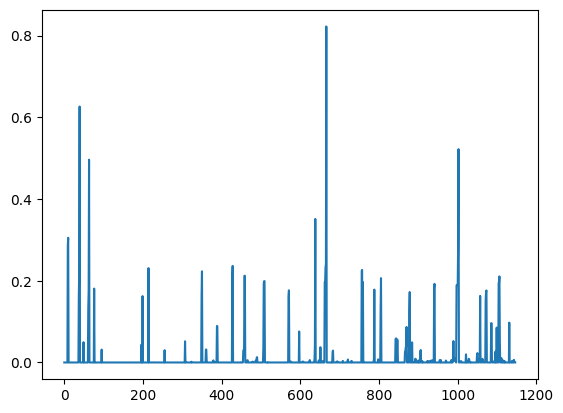

In [108]:
plt.plot(gap)

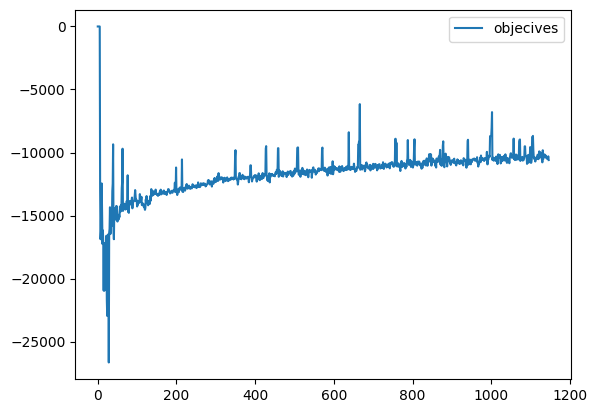

In [110]:
#plt.plot(bounds_f,label="bounds")
plt.plot(objVals_f, label="objecives")
plt.legend()
plt.show()

## Previous Model Test

In [35]:
model = gp.read("./model_write/" + file_name + "_master_out1613.lp")
constrs_len = len(model.getConstrs())
#print(constrs_len)
clusters = np.loadtxt("./model_matrix/"+file_name+"_clusters.txt")
distances = np.loadtxt("./model_matrix/"+file_name+"_distances.txt")
slacks = np.loadtxt("./model_matrix/"+file_name+"_slacks.txt")
solutions = np.loadtxt("./model_matrix/"+file_name+"_solutions.txt")
objectives = np.loadtxt("./model_matrix/"+file_name+"_objectives.txt")
new_centers = np.loadtxt("./model_matrix/"+file_name+"_t.txt")
new_centers = [(i[0],i[1]) for i in new_centers]

Read LP format model from file ./model_write/test9_slack11_master_out1613.lp
Reading time = 0.21 seconds
: 205 rows, 7168 columns, 453594 nonzeros


In [18]:
clusters.shape

(6964, 204)

In [36]:
clusters = np.concatenate((clusters,np.ones(clusters.shape[0]).reshape(-1,1)),axis=1)
A = [[model.getCoeff(constr, var) for var in model.getVars()] for constr in model.getConstrs()]
b = [constr.rhs for constr in model.getConstrs()]
c = [var.obj for var in model.getVars()]
induced_mat = np.concatenate((clusters[:K,:],np.eye(constrs_len-1,constrs_len),clusters[K:,:]),axis=0).T
A = np.array(A)

In [37]:
additional_cluster_in_the_last_round = induced_mat.shape[1] - A.shape[1]

In [43]:
#print(A[:20,:20])

Compare the linear system of constraints from the last iteration of Gurobi with the cluster representations

In [9]:
np.allclose(induced_mat[:,:A.shape[1]],A)

True

In [10]:
dist_gurobi = np.array(c[:K] + c[K + constrs_len-1:])
dist_stored = np.array(distances)[:dist_gurobi.shape[0]]

Compare the coefficients of variables in the objective from the last iteration of Gurobi with the cluster representations

In [12]:
print(dist_stored)

[3409.05438148   68.29650393   17.20620399 ...  415.07182549  427.42892999
  427.84431451]


In [14]:
np.allclose(dist_gurobi,dist_stored)

True

## Reconstruct problem from model matrix

In [34]:
n

200

In [38]:
m = clusters.shape[0] - additional_cluster_in_the_last_round
r = distances.tolist()
s = clusters[:m,:n].tolist()
new_t = clusters[:m,n:n+l].T.tolist()

In [39]:
np.array(new_t).shape

(4, 6964)

In [40]:
%%capture
for i in range(100,1100,200):
    for j in range(20,100,20):
        filename = "test9_slack11_recon_"+str(j)+"_"+str(i)
        main_loop(filename, 100, K, n, m, l, r, beta, s, new_t, alpha,
            M, q, lower, upper, X[:, 0], X[:, 1], new_centers,slack = (j,i,True))

In [11]:
%%capture
main_loop("test9_slack11_recon_20_100", 100, K, n, m, l, r, beta, s, new_t, alpha,
          M, q, lower, upper, X[:, 0], X[:, 1], new_centers,slack = (20,100,True))
main_loop("test9_slack11_recon_40_100", 100, K, n, m, l, r, beta, s, new_t, alpha,
          M, q, lower, upper, X[:, 0], X[:, 1], new_centers,slack = (40,100,True))
main_loop("test9_slack11_recon_60_100", 100, K, n, m, l, r, beta, s, new_t, alpha,
          M, q, lower, upper, X[:, 0], X[:, 1], new_centers,slack = (60,100,True))
main_loop("test9_slack11_recon_80_100", 100, K, n, m, l, r, beta, s, new_t, alpha,
          M, q, lower, upper, X[:, 0], X[:, 1], new_centers,slack = (80,100,True))

In [41]:
def decompose_objectives(file_name,n,part_coef,rep_coef):
    #print(file_name)
    #clusters1 = np.loadtxt("./model_matrix/"+file_name+"_clusters.txt")
    distances1 = np.loadtxt("./model_matrix/"+file_name+"_distances.txt")
    slacks1 = np.loadtxt("./model_matrix/"+file_name+"_slacks.txt")
    solutions1 = np.loadtxt("./model_matrix/"+file_name+"_solutions.txt")
    objectives1 = np.loadtxt("./model_matrix/"+file_name+"_objectives.txt")
    #new_centers1 = np.loadtxt("./model_matrix/"+file_name+"_t.txt")
    #new_centers1 = [(i[0],i[1]) for i in new_centers1]
    
    #print("distances",distances1.shape)
    #print("solutions",solutions1.shape)
    
    iters = solutions1.shape[0]
    cluster_pool_size = solutions1.shape[1]
    
    sum_of_distances = np.array([distances1[:cluster_pool_size] @ solutions1[k] for k in range(iters)])
    sum_of_partition_slacks = np.array([sum(slacks1[k,:n]) for k in range(iters)])
    sum_of_rep_slacks = np.array([sum(slacks1[k,n:]) for k in range(iters)])
    
    objectives_recon = sum_of_distances + part_coef * sum_of_partition_slacks + rep_coef * sum_of_rep_slacks
    
    #print(objectives_recon-objectives1)
    
    #assert(False)
    
    assert(np.allclose(objectives_recon, objectives1,  atol=1e-1))
    
    return sum_of_distances,sum_of_partition_slacks,sum_of_rep_slacks,objectives_recon

100 20


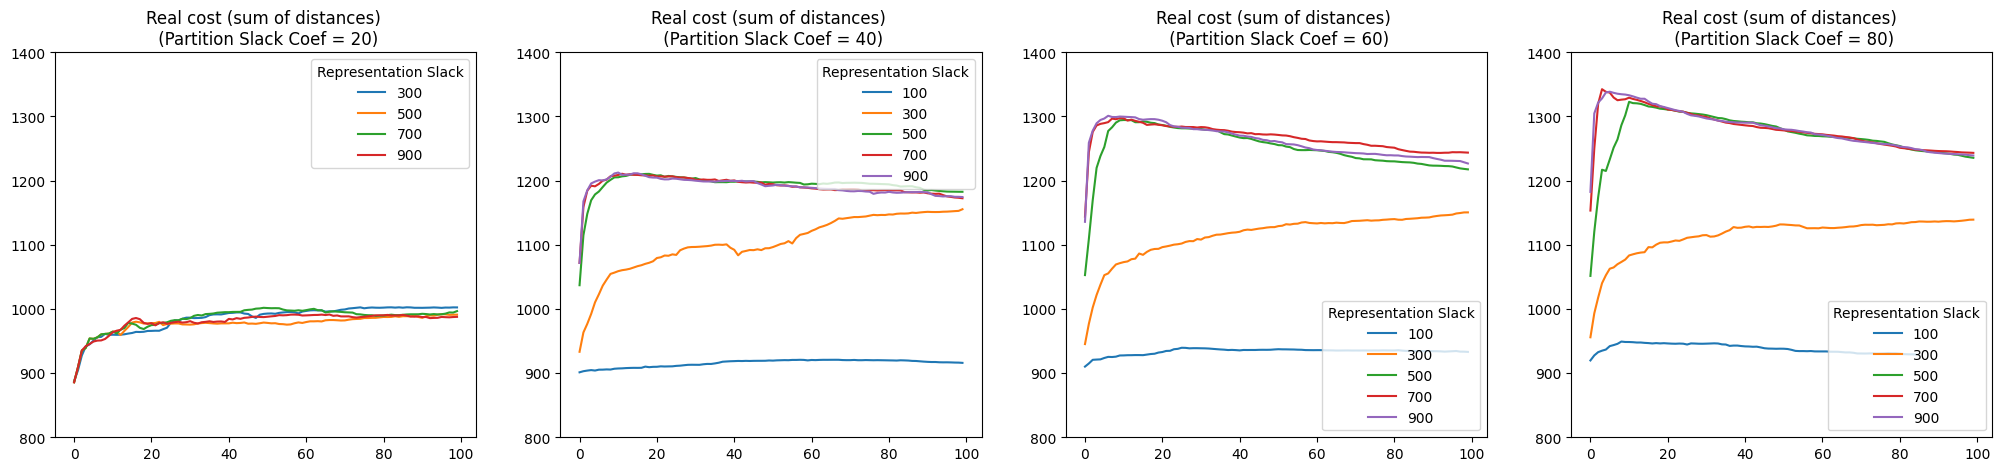

In [43]:
counter = 0
fig, ax = plt.subplots(1, 4, figsize=(25,5))
for j in range(20,100,20):
    for i in range(100,1100,200):
        filename = "test9_slack11_recon_"+str(j)+"_"+str(i)
        try:
            s1,s2,s3,s4 = decompose_objectives(filename,200,j,i)
        except:
            print(i,j)
            continue
        ax[counter].plot(s1, label=str(i))
    ax[counter].set_title("Real cost (sum of distances) \n (Partition Slack Coef = " + str(j) + ")")
    ax[counter].legend(title = "Representation Slack")
    ax[counter].set_ylim((800,1400))
    counter += 1

plt.show()
    

test9_slack11_recon_20_100
True
test9_slack11_recon_40_100
True
test9_slack11_recon_60_100
True
test9_slack11_recon_80_100
True


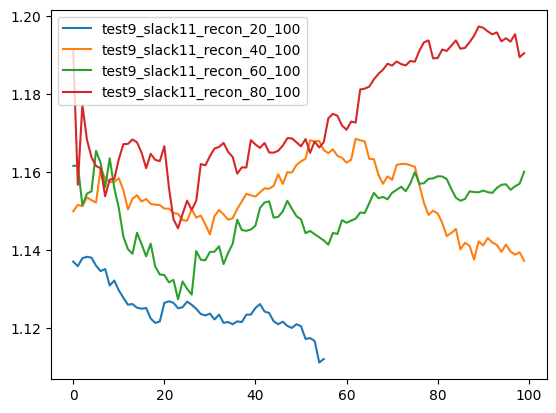

In [29]:
tests = ["test9_slack11_recon_20_100","test9_slack11_recon_40_100","test9_slack11_recon_60_100","test9_slack11_recon_80_100"]
part_coefs = [20,40,60,80]
rep_coefs = [100,100,100,100]
for i in range(len(tests)):
    s1,s2,s3 = decompose_objectives(tests[i],200,part_coefs[i],rep_coefs[i])
    plt.plot(s3,label=tests[i])
plt.legend()
plt.show()

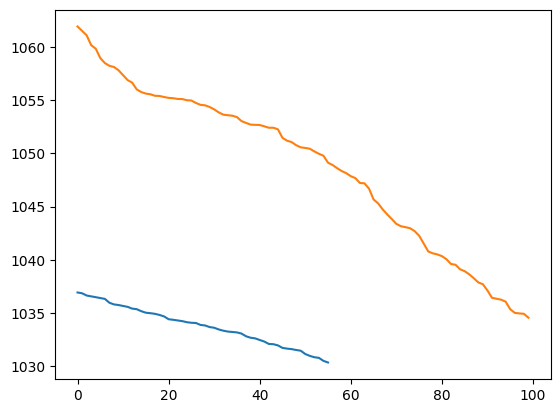

In [15]:
plt.plot(objectives20)
plt.plot(objectives40)

In [30]:
recon_model = gp.read("./model_write/" + "test7_recon_master" + "_out1.lp")
constrs_len = len(model.getConstrs())
print(constrs_len)
# clusters = np.loadtxt("./model_matrix/"+file_name+"_clusters.txt")
# distances = np.loadtxt("./model_matrix/"+file_name+"_distances.txt")
recon_slacks = np.loadtxt("./model_matrix/"+"test7_recon"+"_slacks.txt")
recon_solutions = np.loadtxt("./model_matrix/"+"test7_recon"+"_solutions.txt")
# objectives = np.loadtxt("./model_matrix/"+file_name+"_objectives.txt")
# new_centers = np.loadtxt("./model_matrix/"+file_name+"_t.txt")
# new_centers = [(i[0],i[1]) for i in new_centers]

Read LP format model from file ./model_write/test7_recon_master_out1.lp
Reading time = 0.52 seconds
: 204 rows, 9587 columns, 794929 nonzeros
204


In [35]:
recon_solutions

array([0.     , 0.     , 0.00389, ..., 0.     , 0.     , 0.     ])

In [36]:
np.allclose(solutions[-1,:],recon_solutions)

True

Reoptimize the model using the Gurobi output of the master problem from the last iteration

In [23]:
model.optimize()

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 204 rows, 9587 columns and 794929 nonzeros
Model fingerprint: 0x85c27925
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+00]
Presolve time: 0.33s
Presolved: 204 rows, 9587 columns, 794929 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.065e+04
 Factor NZ  : 2.091e+04 (roughly 4 MB of memory)
 Factor Ops : 2.851e+06 (less than 1 second per iteration)
 Threads    : 3

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.20714748e+06  0.00000

In [14]:
sol_num = 999

In [15]:
objectives[sol_num], model.ObjVal

(786.1297149421915, 786.129714942192)

In [16]:
last_sol_gurobi = [var.X for var in model.getVars()]
last_sol_gurobi_Z = last_sol_gurobi[:K] + last_sol_gurobi[K + constrs_len-1:]
last_sol_gurobi_slackness = last_sol_gurobi[K:K + constrs_len-1]

In [17]:
np.allclose(last_sol_gurobi_Z, solutions[sol_num][:len(last_sol_gurobi_Z)], atol = 1e-5)

True

check partition constraints

In [33]:
valid = True
for j in range(0,1000,20):
    partition_constr = [clusters[:solutions[j].shape[0],i] @ solutions[j] + slacks[j][i] for i in range(n)]
    valid = valid and (np.allclose(np.array(partition_constr),np.ones(n),rtol=1e-3))

In [19]:
print(partition_constr)

[1.00003, 1.0000126872938488, 1.00002, 1.00001, 1.0000099999999998, 1.00001, 1.0000156330806393, 1.00001, 1.0000200000000001, 1.00001, 1.00002, 1.0000099999999998, 1.0000229354506225, 1.00001, 1.0000095743134358, 1.00001, 1.00003, 1.00001, 1.00002, 1.0, 1.00001, 1.00001, 1.00001, 1.0000225943539045, 1.00002, 1.00003, 1.00001, 1.00004, 1.00004, 1.0000499999999999, 1.0000300000000002, 1.0000399999999998, 1.00004, 1.00006, 1.0000499999999999, 1.00002, 1.00003, 1.00003, 1.0000499999999999, 1.0000399999999998, 1.0000399999999998, 1.0000099999999998, 1.0000300000000002, 1.00003, 1.00003, 1.0000499999999999, 1.0000499999999999, 1.0000200000000001, 1.0000499999999999, 1.00004, 1.00003, 1.00001, 1.00003, 1.00004, 1.00003, 1.00004, 1.0000299999999998, 1.0000299999999998, 1.00004, 1.00003, 1.0000200000000001, 1.0000200000000001, 1.0000393463136177, 1.00001, 1.0000399999999998, 1.00003, 1.00001, 1.0000200000000001, 1.00004, 1.0000106460588811, 1.0000200000000001, 1.00001, 1.00004, 1.00002999999999

In [20]:
print(valid)

True


In [22]:
cluster_sizes = [sum(c[:n]) for c in clusters]

In [34]:
partition_constr_columns = []
for j in range(1000):
    partition_constr_columns.append(cluster_sizes[:len(solutions[j])] @ solutions[j] + sum(slacks[j][:n]))
print(partition_constr_columns)

[200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0011733333334, 200.0011733333334, 199.99891, 199.9989767741936, 199.99926, 199.99863153846172, 199.99946294117655, 199.99964517241386, 200.00089727272737, 199.99943, 200.00077777777787, 199.99917228915666, 199.9994710112359, 200.0013503703704, 200.00071448430486, 200.00005324324326, 199.9986941025642, 199.99907588235288, 199.9980842857143, 200.00058559548683, 200.00319130434784, 200.0016850323974, 199.9976095758815, 199.999155104625, 199.9965794313528, 199.9985854018343, 199.99687333790263, 200.0007227046925, 199.9992692582563, 199.99860155121118, 199.99861249164476, 200.00151058593963, 199.9993611997037, 199.99962776423735, 199.998770866349, 199.99975468717236, 200.0010900460234, 199.9989761124637, 199.99904103212728, 199.99996057101487, 199.99911737477046, 200.00130943833176, 200.00096020455555, 199.9994211

In [41]:
np.allclose(partition_constr_columns, np.ones(1000) * 200, atol = 1e-2)

True

check number of clusters constraint

In [335]:
np.sum(solutions[500])

4.999969999999999

checks the cluster representation of t of the same as the t in the LP

In [338]:
m = solutions[500].shape[0]

In [339]:
t1 = []
t2 = []
for i in (range(m)):
    t_vector = []
    for j in range(l):
        cluster = clusters[i,:n]
        size = sum(cluster)
        group_size = cluster @ q[j]
        if group_size >= alpha * size:
            t_vector.append(1)
        else:
            t_vector.append(0)
    t1.append(t_vector)
    t2.append(clusters[i,n:n+l])

In [341]:
np.allclose(t1,t2,atol=1e-3)

True

check fairness constraint

In [357]:
groups = [[] for _ in range(l)]
slack_groups = [[] for _ in range(l)]
for sol_num in range(1000):   
    for i in range(n,n+l):
        groups[i-n].append(solutions[sol_num] @ clusters[:solutions[sol_num].shape[0],i] + slacks[sol_num][i])
        slack_groups[i-n].append(slacks[sol_num][i])

<function matplotlib.pyplot.show(close=None, block=None)>

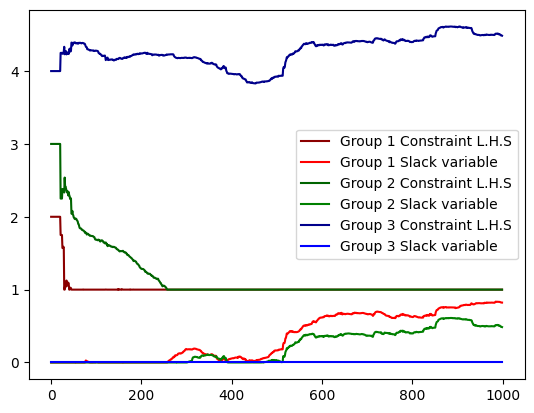

In [385]:
plt.plot(groups[0], c = "darkred", label = "Group 1 Constraint L.H.S")
plt.plot(slack_groups[0], c = "red", label = "Group 1 Slack variable")
plt.plot(groups[1], c = "darkgreen", label = "Group 2 Constraint L.H.S")
plt.plot(slack_groups[1], c = "green", label = "Group 2 Slack variable")
plt.plot(groups[2], c = "darkblue", label = "Group 3 Constraint L.H.S")
plt.plot(slack_groups[2], c = "blue", label = "Group 3 Slack variable")
plt.legend()
plt.show

compares the solutions from Gurobi's log file with the stored solutions

In [50]:
df = pd.read_csv("./tests/model_write/" + file_name + "_out501.sol", sep = " ")

In [51]:
last_solution_gurobi = df['Solution'][1:].to_numpy(dtype=float)

In [52]:
last_solution_gurobi_Z = np.concatenate((last_solution_gurobi[:K], last_solution_gurobi[K + constrs_len - 1:]))

In [53]:
last_solution_gurobi_slackness = last_solution_gurobi[K:K + constrs_len - 1]

In [54]:
np.allclose(last_solution_gurobi_slackness, slacks[500], atol = 1e-3)

True

In [55]:
np.allclose(last_solution_gurobi_Z, solutions[500][:last_solution_gurobi_Z.shape[0]], atol = 1e-3)

True

## Visualizations

In [35]:
slacks[-1]

array([0.00280419, 0.32448581, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01432712, 0.00220102, 0.05266005,
       0.        , 0.01640727, 0.        , 0.        , 0.54384011,
       0.        , 0.00249299, 0.        , 0.        , 0.        ,
       0.        , 0.01120203, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00087467, 0.        , 0.        ,
       0.01285034, 0.        , 0.        , 0.00392717, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.08211683,
       0.        , 0.00619237, 0.        , 0.        , 0.     

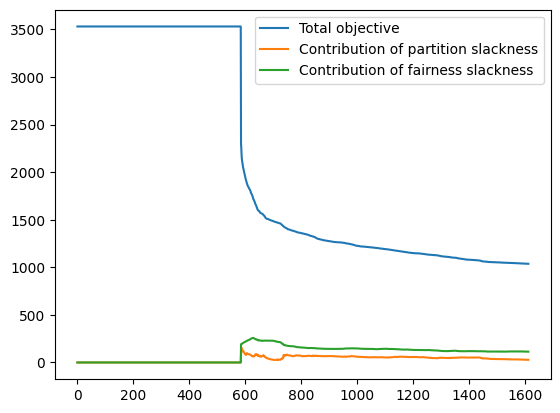

In [36]:
partition_slacks = [20 * sum(i[:n]) for i in slacks]
fairness_slacks = [100 * sum(i[n:]) for i in slacks]
plt.plot(objectives, label = "Total objective")
plt.plot(partition_slacks, label = "Contribution of partition slackness")
plt.plot(fairness_slacks, label = "Contribution of fairness slackness")
plt.legend()
plt.show()

In [37]:
cmap = sns.cm.rocket_r

In [15]:
fig = plt.figure(dpi = 1000)
sns.heatmap(solutions,cmap = cmap,vmax = 0.1)
fig.savefig("./tests/images/heatmap_"+ file_name +".png")
plt.close()

FileNotFoundError: [Errno 2] No such file or directory: './tests/images/heatmap_test9_slack11.png'

Error in callback <function flush_figures at 0x0000015CFA770EE0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [17]:
def create_df(solution):
    indices = list(range(len(solution)))
    indices_sorted = sorted(indices,key= lambda i : -solution[i])
    solutions_sorted = np.array(solution)[indices_sorted]
    fairness_rep = [tuple(c[n:n+l]) for c in clusters[indices_sorted]]
    df = pd.DataFrame({"Cluster Number": indices_sorted, 
                        "Solution": solutions_sorted,
                        "Cluster cost": np.array(distances)[indices_sorted], 
                        "Size of cluster": np.sum(np.array(clusters)[indices_sorted,:n],axis = 1),
                        "Fairness": fairness_rep})
    
    coverages,overlaps = coverage(list(df['Cluster Number']))
    df['coverage'] = coverages
    df['overlap'] = overlaps
    
    return df

In [18]:
def coverage(cluster_nums):
    cover = np.zeros(n)
    coverages = []
    overlaps = []
    for i in cluster_nums:
        cover += clusters[i][:n]
        coverage = 0
        overlap = 0
        for i in cover:
            if i > 0:
                coverage += 1
            if i > 1:
                overlap += i - 1
        coverages.append(coverage)
        overlaps.append(overlap)
    return coverages,overlaps

In [38]:
df = create_df(solutions[-1])

In [39]:
df[:20]

,Cluster Number,Solution,Cluster cost,Size of cluster,Fairness,coverage,overlap
0,3615,0.30928,70.031531,19.0,"(0.0, 1.0, 0.0, 0.0)",19,0.0
1,6369,0.24204,133.509311,25.0,"(0.0, 1.0, 0.0, 0.0)",30,14.0
2,5986,0.23485,164.817422,47.0,"(0.0, 0.0, 0.0, 1.0)",70,21.0
3,6077,0.20553,145.355557,25.0,"(0.0, 1.0, 0.0, 0.0)",79,37.0
4,4963,0.18506,150.103961,49.0,"(0.0, 0.0, 0.0, 0.0)",124,41.0
5,5037,0.18438,227.236466,46.0,"(0.0, 0.0, 0.0, 0.0)",167,44.0
6,5322,0.15197,159.804863,31.0,"(1.0, 0.0, 0.0, 0.0)",175,67.0
7,5829,0.14240,69.393032,39.0,"(0.0, 0.0, 0.0, 0.0)",183,98.0
8,4163,0.12721,159.038550,29.0,"(1.0, 0.0, 0.0, 0.0)",184,126.0
9,2970,0.11646,250.965084,44.0,"(0.0, 0.0, 0.0, 0.0)",189,165.0


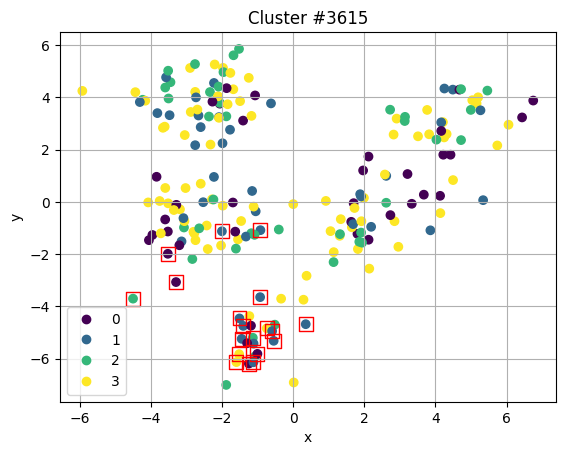

In [22]:
cluster_num = 3615
cluster_x = []
cluster_y = []
for i,j in enumerate(clusters[cluster_num][:n]):
    if j == 1:
        cluster_x.append(X[:,0][i])
        cluster_y.append(X[:,1][i])

scatter = plt.scatter(X[:,0],X[:,1],c=labels,label="Groups")
plt.scatter(cluster_x,cluster_y,marker="s",edgecolors="r",facecolors='none',s=100)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cluster #' + str(cluster_num))
plt.grid(True)
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1,2,3])
plt.show()

1. lower bound , reduced costs, of pricing problem evolve over iterations
2. number of points in the cluster
3. fix a cluster and then move to a smaller problem, for all other clusters, change corresponding rows to 0 but keep the rest
4. cluster generation after bumping penalty to 1000

## Parameters

In [40]:
Zvars = model.getVars()[:K] + model.getVars()[K + constrs_len-1:]
Slack_vars_partition = model.getVars()[K : K + n]
Slack_vars_represent = model.getVars()[K + n : K + n + l]

In [41]:
len(Zvars) + len(Slack_vars_partition) + len(Slack_vars_represent) == len(model.getVars())

True

In [46]:
objective = gp.quicksum(Zvars[i] * dist_gurobi[i] for i in range(len(Zvars))) + \
    gp.quicksum(i * 1000 for i in Slack_vars_partition) + \
    gp.quicksum(i * 1000 for i in Slack_vars_represent)
model.setObjective(objective, GRB.MINIMIZE)
model.optimize()

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 205 rows, 7168 columns and 453594 nonzeros
Model fingerprint: 0xfdb62c3f
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+01, 4e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+00]


Presolve time: 0.15s
Presolved: 205 rows, 7168 columns, 453594 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.082e+04
 Factor NZ  : 2.112e+04 (roughly 3 MB of memory)
 Factor Ops : 2.893e+06 (less than 1 second per iteration)
 Threads    : 3

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.13053037e+06  0.00000000e+00  3.40e+03 0.00e+00  1.46e+00     0s
   1   4.12399049e+04 -4.50396246e+03  3.72e+01 5.33e-15  2.19e-02     0s
   2   1.35165212e+04 -1.55924082e+03  1.06e+01 3.11e-15  6.71e-03     0s
   3   4.18443930e+03  5.04036327e+02  1.62e+00 3.55e-15  1.48e-03     0s
   4   2.37555562e+03  1.52632813e+03  5.15e-02 3.55e-15  2.44e-04     0s
   5   2.10826752e+03  1.88406007e+03  3.85e-03 5.33e-15  6.15e-05     0s
   6   2.01114805e+03  1.95684056e+03  7.30e-04 3.55e-15  1.49e-05     1s
   7   1.9807

In [49]:
[var.X for var in Slack_vars_represent]

[0.34359358398924944, 0.07897303783664594, 0.21999214408455692, 0.0]

In [47]:
sum(var.X for var in Slack_vars_partition) == 0, sum(var.X for var in Slack_vars_represent) == 0

(True, False)

In [50]:
solution_no_slack = np.array([z.X for z in Zvars])

In [51]:
np.allclose(np.ones(n),[clusters[:len(solution_no_slack),i] @ solution_no_slack for i in range(n)])

True

In [52]:
for i in range(n,n+l):
    print(solution_no_slack @ clusters[:solution_no_slack.shape[0],i])

0.6564064160107506
0.921026962163354
0.7800078559154431
0.9999999999999996


In [53]:
df2 = create_df(solution_no_slack)

In [54]:
df2[:20]

,Cluster Number,Solution,Cluster cost,Size of cluster,Fairness,coverage,overlap
0,4163,0.189640,159.038550,29.0,"(1.0, 0.0, 0.0, 0.0)",29,0.0
1,3615,0.180044,70.031531,19.0,"(0.0, 1.0, 0.0, 0.0)",48,0.0
2,6369,0.179091,133.509311,25.0,"(0.0, 1.0, 0.0, 0.0)",59,14.0
3,6077,0.162776,145.355557,25.0,"(0.0, 1.0, 0.0, 0.0)",70,28.0
4,5322,0.135440,159.804863,31.0,"(1.0, 0.0, 0.0, 0.0)",82,47.0
5,6905,0.095919,116.120535,21.0,"(0.0, 1.0, 0.0, 0.0)",92,58.0
6,4963,0.094557,150.103961,49.0,"(0.0, 0.0, 0.0, 0.0)",140,59.0
7,5986,0.093172,164.817422,47.0,"(0.0, 0.0, 0.0, 1.0)",174,72.0
8,5037,0.089828,227.236466,46.0,"(0.0, 0.0, 0.0, 0.0)",178,114.0
9,2582,0.087002,189.717541,33.0,"(0.0, 0.0, 1.0, 0.0)",184,141.0


In [284]:
c2 = [var.obj for var in model.getVars()]
c2 == c

In [76]:
def get_nonzeros(l):
    res = []
    for i,j in enumerate(l):
        if j != 0:
            res.append(i)
    #print(l)
    print(res)